<a href="https://colab.research.google.com/github/alfiramdhan/Customer-Retention-Analysis/blob/main/Customer_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Transaction
url = "https://drive.google.com/file/d/11nYwh8cxKl7rHccMCsJy7jaBVNcktWeL/view?usp=share_link"
output = "df_trans.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

trans = pd.read_pickle('/content/df_trans.pickle')
trans

Downloading...
From: https://drive.google.com/uc?id=11nYwh8cxKl7rHccMCsJy7jaBVNcktWeL
To: /content/df_trans.pickle
100%|██████████| 97.3M/97.3M [00:02<00:00, 45.8MB/s]


,po_number,transaction_date,order_id,order_status,payment_group,shipping_agency,shipping_cost,total_project_value,revenue,seller_id,...,product_name,main_cat,brand,price_per_item,quantity,price_total,free_shipping,ppn,weight_total,unit
0,PO-2022-12-12-8804434,2022-12-12,463776,Selesai,TOP,mandiriva,0,53280000,399600,None,...,Oli Compressor ATLAS Synthetic base,Pertukangan,ROTO Synthetic,16000000.0,3,48000000,True,5280000,90000,pcs
1,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Neonbox LED dengan tiang Saung Pananjung Bandung,Jasa Advertising,None,6000000.0,1,6000000,True,660000,17500,pcs
2,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Wallpaper Ayam Goreng Bang Toung Jakarta,Jasa Percetakan & Media,None,2348760.0,1,2348760,True,258364,10967,pcs
3,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Backdrop Pondok Indah Cipala Banten,Jasa Percetakan & Media,None,1898750.0,1,1898750,True,208862,6767,pcs
4,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Alas Meja Pondok Indah Cipala Banten,Jasa Percetakan & Media,None,1021410.0,1,1021410,True,112355,3440,pcs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474565,PO-2022-11-30-4342388,2022-11-30,455045,Selesai,Direct,QREN,9000,59000,442,63aa70cbcb47446d5bdef77a,...,Cheese Stick 100g,Makanan & Minuman,TRIQUE,50000.0,1,50000,False,0,200,pcs
474566,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,42000,142000,1065,63aa720fcb47446d5bdf1413,...,Kebab Mini,Makanan & Minuman,FROZEN CB 8,20000.0,2,40000,False,0,1000,pack
474567,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,42000,142000,1065,63aa720fcb47446d5bdf1413,...,Tahu Baso Sapi,Makanan & Minuman,FROZEN CB 8,20000.0,3,60000,False,0,1500,pack
474568,PO-2022-07-21-143881,2022-07-21,293510,Selesai,Direct,QREN,0,6500,48,63aa832bcb47446d5be0c3dd,...,Pulsa Elektrik Telkomsel 5 Ribu,Barang Lainnya,Telkomsel,6500.0,1,6500,True,0,10,pcs


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            474570 non-null  object 
 1   transaction_date     474570 non-null  dbdate 
 2   order_id             474570 non-null  Int64  
 3   order_status         474570 non-null  object 
 4   payment_group        474570 non-null  object 
 5   shipping_agency      474570 non-null  object 
 6   shipping_cost        474570 non-null  Int64  
 7   total_project_value  474570 non-null  Int64  
 8   revenue              474570 non-null  Int64  
 9   seller_id            474559 non-null  object 
 10  seller_category      474559 non-null  object 
 11  buyer_id             474570 non-null  object 
 12  seller_province      474559 non-null  object 
 13  seller_city          474559 non-null  object 
 14  seller_flag          474559 non-null  object 
 15  buyer_province   

In [5]:
# convert the order_id to object
#trans['order_id'] = trans['order_id'].astype(str)

# Convert the column to datetime format
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], format='%Y-%m-%d')

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            474570 non-null  object        
 1   transaction_date     474570 non-null  datetime64[ns]
 2   order_id             474570 non-null  Int64         
 3   order_status         474570 non-null  object        
 4   payment_group        474570 non-null  object        
 5   shipping_agency      474570 non-null  object        
 6   shipping_cost        474570 non-null  Int64         
 7   total_project_value  474570 non-null  Int64         
 8   revenue              474570 non-null  Int64         
 9   seller_id            474559 non-null  object        
 10  seller_category      474559 non-null  object        
 11  buyer_id             474570 non-null  object        
 12  seller_province      474559 non-null  object        
 13  seller_city   

In [6]:
trans['buyer_id'].nunique()

12810

In [94]:
# trans[['order_id','shipping_cost','total_project_value','revenue','quantity','price_total','ppn','weight_total']] = trans[['order_id','shipping_cost','total_project_value','revenue','quantity','price_total','ppn','weight_total']].astype('int8')
# trans['price_per_item'] = trans['price_per_item'].astype('float32')

In [95]:
# trans.info()

In [96]:
# save dataset into csv
# trans.to_csv('/content/drive/MyDrive/dataset.csv', index=False)

In [97]:
# Assuming 'df' is your DataFrame
# trans.to_csv('trans.csv', index=False)

# Calculate CLV using Historical approache

In [7]:
# Aggregate customer data:
buyer_revenue = trans.groupby('buyer_id')['revenue'].sum().reset_index()
buyer_revenue

,buyer_id,revenue
0,631a4da47255a77e0e6d7410,1596942
1,631a4f977255a77e0e6dec73,70239137
2,631a51497255a77e0e6eb585,43940336
3,631a514d7255a77e0e6eb6e5,33357
4,631a514e7255a77e0e6eb785,5857
...,...,...
12805,63b0642410d7d4a770888d88,774
12806,63b0643d10d7d4a770888e72,774
12807,63b0656910d7d4a770889040,774
12808,63b0657e031d7b3fee1ab87d,774


                       buyer_id     revenue
1      631a4f977255a77e0e6dec73    70239137
2      631a51497255a77e0e6eb585    43940336
5      631a514f7255a77e0e6eb7c9   335307772
10     631a51567255a77e0e6eba32  1829530893
11     631a51577255a77e0e6ebada   208706091
...                         ...         ...
12385  63a148f6fee1688b9e68c294     4068820
12388  63a154a4fee1688b9e69b573     5678971
12394  63a204aaefba37d09b598447     3427915
12400  63a2bdeb18e286c39b3f37a4    20574444
12444  63a96a04d2c84f87b7e98104     5531504

[2394 rows x 2 columns]


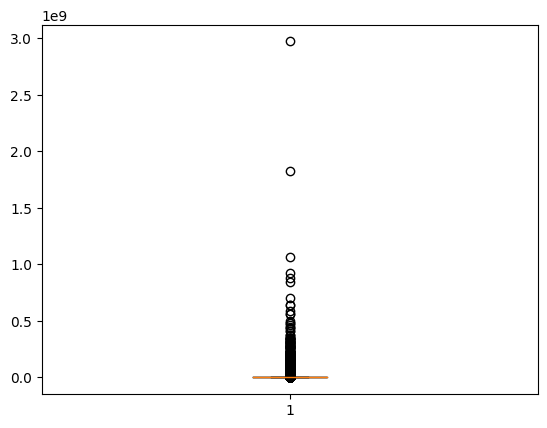

In [8]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = buyer_revenue['revenue'].quantile(0.25)
Q3 = buyer_revenue['revenue'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Create a box plot of the 'revenue' column
plt.boxplot(buyer_revenue['revenue'])

# Identify outliers based on the defined threshold
outliers = buyer_revenue[(buyer_revenue['revenue'] < Q1 - threshold * IQR) | (buyer_revenue['revenue'] > Q3 + threshold * IQR)]

print(outliers)

In [134]:
outliers.min()

buyer_id    631a4f977255a77e0e6dec73
revenue                      2343470
dtype: object

In [135]:
outliers.max()

buyer_id    63a96a04d2c84f87b7e98104
revenue                   2972556744
dtype: object

In [9]:
# Filter the DataFrame to exclude outliers
filtered_df = buyer_revenue[(buyer_revenue['revenue'] >= Q1 - threshold * IQR) & (buyer_revenue['revenue'] <= Q3 + threshold * IQR)]

print(filtered_df)

                       buyer_id  revenue
0      631a4da47255a77e0e6d7410  1596942
3      631a514d7255a77e0e6eb6e5    33357
4      631a514e7255a77e0e6eb785     5857
6      631a51507255a77e0e6eb83a   136542
7      631a51527255a77e0e6eb8f5   155883
...                         ...      ...
12805  63b0642410d7d4a770888d88      774
12806  63b0643d10d7d4a770888e72      774
12807  63b0656910d7d4a770889040      774
12808  63b0657e031d7b3fee1ab87d      774
12809  63b0659310d7d4a77088905e      774

[10416 rows x 2 columns]


In [10]:
# Customer lifespan:
buyer_lifespan = trans.groupby('buyer_id')['transaction_date'].agg(['min', 'max']).reset_index()

# add 1 day to the max variable in the buyer_lifespan using pd.DateOffset function
# to avoid 0 value in lifespan
buyer_lifespan['max'] = pd.to_datetime(buyer_lifespan['max']) + pd.DateOffset(days=1)
buyer_lifespan['lifespan'] = buyer_lifespan['max'] - buyer_lifespan['min']
buyer_lifespan['lifespan'] = buyer_lifespan['lifespan'].dt.days
print(buyer_lifespan)

                       buyer_id        min        max  lifespan
0      631a4da47255a77e0e6d7410 2022-01-04 2022-12-22       352
1      631a4f977255a77e0e6dec73 2022-01-10 2022-12-30       354
2      631a51497255a77e0e6eb585 2022-01-25 2022-12-30       339
3      631a514d7255a77e0e6eb6e5 2022-07-05 2022-11-18       136
4      631a514e7255a77e0e6eb785 2022-09-26 2022-09-27         1
...                         ...        ...        ...       ...
12805  63b0642410d7d4a770888d88 2022-03-25 2022-03-26         1
12806  63b0643d10d7d4a770888e72 2022-12-28 2022-12-29         1
12807  63b0656910d7d4a770889040 2022-07-06 2022-07-07         1
12808  63b0657e031d7b3fee1ab87d 2022-11-03 2022-11-04         1
12809  63b0659310d7d4a77088905e 2022-06-10 2022-06-11         1

[12810 rows x 4 columns]


In [11]:
# merge DF : filterd_df and buyer_lifespan

merged_buyer = pd.merge(buyer_lifespan, filtered_df, on='buyer_id')
merged_buyer['CLV'] = merged_buyer['revenue'] / merged_buyer['lifespan']

print(merged_buyer)

                       buyer_id        min        max  lifespan  revenue  \
0      631a4da47255a77e0e6d7410 2022-01-04 2022-12-22       352  1596942   
1      631a514d7255a77e0e6eb6e5 2022-07-05 2022-11-18       136    33357   
2      631a514e7255a77e0e6eb785 2022-09-26 2022-09-27         1     5857   
3      631a51507255a77e0e6eb83a 2022-03-23 2022-09-26       187   136542   
4      631a51527255a77e0e6eb8f5 2022-01-12 2022-12-29       351   155883   
...                         ...        ...        ...       ...      ...   
10411  63b0642410d7d4a770888d88 2022-03-25 2022-03-26         1      774   
10412  63b0643d10d7d4a770888e72 2022-12-28 2022-12-29         1      774   
10413  63b0656910d7d4a770889040 2022-07-06 2022-07-07         1      774   
10414  63b0657e031d7b3fee1ab87d 2022-11-03 2022-11-04         1      774   
10415  63b0659310d7d4a77088905e 2022-06-10 2022-06-11         1      774   

               CLV  
0      4536.767045  
1       245.272059  
2           5857.0  
3  

In [12]:
merged_buyer.describe()

,lifespan,revenue,CLV
count,10416.000000,10416.0,10416.0
mean,124.990015,182833.452573,16322.518781
std,130.656466,446034.353759,118708.124209
min,1.000000,0.0,0.0
25%,1.000000,852.0,55.060026
50%,76.000000,3543.0,637.0
75%,258.000000,50751.0,1580.755538
max,365.000000,2338526.0,2260128.0


In [140]:
# Create Seller Value Group

bins = [0, 55.060026, 637.0, 1580.755538, 2260128.0]
labels = ['Low Value', 'Medium Value', 'High Value', 'VIP']

merged_buyer['Buyer Value Group'] = pd.cut(merged_buyer['CLV'], bins=bins, labels=labels)

print(merged_buyer)

                       buyer_id        min        max  lifespan  revenue  \
0      631a4da47255a77e0e6d7410 2022-01-04 2022-12-22       352  1596942   
1      631a514d7255a77e0e6eb6e5 2022-07-05 2022-11-18       136    33357   
2      631a514e7255a77e0e6eb785 2022-09-26 2022-09-27         1     5857   
3      631a51507255a77e0e6eb83a 2022-03-23 2022-09-26       187   136542   
4      631a51527255a77e0e6eb8f5 2022-01-12 2022-12-29       351   155883   
...                         ...        ...        ...       ...      ...   
10411  63b0642410d7d4a770888d88 2022-03-25 2022-03-26         1      774   
10412  63b0643d10d7d4a770888e72 2022-12-28 2022-12-29         1      774   
10413  63b0656910d7d4a770889040 2022-07-06 2022-07-07         1      774   
10414  63b0657e031d7b3fee1ab87d 2022-11-03 2022-11-04         1      774   
10415  63b0659310d7d4a77088905e 2022-06-10 2022-06-11         1      774   

               CLV Buyer Value Group  
0      4536.767045               VIP  
1       2

In [141]:
merged_buyer['Buyer Value Group'].value_counts()

Medium Value    2613
VIP             2604
Low Value       2602
High Value      2595
Name: Buyer Value Group, dtype: int64

## High Value vs Low Value

In [142]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            474570 non-null  object        
 1   transaction_date     474570 non-null  datetime64[ns]
 2   order_id             474570 non-null  Int64         
 3   order_status         474570 non-null  object        
 4   payment_group        474570 non-null  object        
 5   shipping_agency      474570 non-null  object        
 6   shipping_cost        474570 non-null  Int64         
 7   total_project_value  474570 non-null  Int64         
 8   revenue              474570 non-null  Int64         
 9   seller_id            474559 non-null  object        
 10  seller_category      474559 non-null  object        
 11  buyer_id             474570 non-null  object        
 12  seller_province      474559 non-null  object        
 13  seller_city   

In [143]:
# Retrieve the desired columns
df_buyer =  trans[['buyer_id', 'transaction_date', 'total_project_value', 'payment_group', 'order_id', 'quantity']]

print(df_buyer)

                        buyer_id transaction_date  total_project_value  \
0       631a5aafaa3096cbda250540       2022-12-12             53280000   
1       631a5c7f8755a8a989600737       2022-10-11             78775501   
2       631a5c7f8755a8a989600737       2022-10-11             78775501   
3       631a5c7f8755a8a989600737       2022-10-11             78775501   
4       631a5c7f8755a8a989600737       2022-10-11             78775501   
...                          ...              ...                  ...   
474565  63341acf3d78e58aa0429c8e       2022-11-30                59000   
474566  63aa9cd8e0c8172b92738dfd       2022-06-07               142000   
474567  63aa9cd8e0c8172b92738dfd       2022-06-07               142000   
474568  63ac321ef2bdefdb4a42878e       2022-07-21                 6500   
474569  63ac321ef2bdefdb4a42878e       2022-11-30                27000   

       payment_group  order_id  quantity  
0                TOP    463776         3  
1                TOP    4

In [144]:
# Merge data
merged_df = pd.merge(merged_buyer, df_buyer, on='buyer_id')
merged_df

,buyer_id,min,max,lifespan,revenue,CLV,Buyer Value Group,transaction_date,total_project_value,payment_group,order_id,quantity
0,631a4da47255a77e0e6d7410,2022-01-04,2022-12-22,352,1596942,4536.767045,VIP,2022-07-18,109000,TOP,107420,2
1,631a4da47255a77e0e6d7410,2022-01-04,2022-12-22,352,1596942,4536.767045,VIP,2022-04-15,39000,TOP,339268,2
2,631a4da47255a77e0e6d7410,2022-01-04,2022-12-22,352,1596942,4536.767045,VIP,2022-09-07,1000000,TOP,316999,1
3,631a4da47255a77e0e6d7410,2022-01-04,2022-12-22,352,1596942,4536.767045,VIP,2022-06-08,1000000,TOP,274517,1
4,631a4da47255a77e0e6d7410,2022-01-04,2022-12-22,352,1596942,4536.767045,VIP,2022-03-02,1000000,TOP,140788,1
...,...,...,...,...,...,...,...,...,...,...,...,...
97545,63b0642410d7d4a770888d88,2022-03-25,2022-03-26,1,774,774.0,High Value,2022-03-25,103200,Direct,69584,6
97546,63b0643d10d7d4a770888e72,2022-12-28,2022-12-29,1,774,774.0,High Value,2022-12-28,103200,Direct,475243,6
97547,63b0656910d7d4a770889040,2022-07-06,2022-07-07,1,774,774.0,High Value,2022-07-06,103200,Direct,323957,6
97548,63b0657e031d7b3fee1ab87d,2022-11-03,2022-11-04,1,774,774.0,High Value,2022-11-03,103200,Direct,438176,6


In [145]:
# Group the data by customer value group
value_group_grouped = merged_df.groupby(['Buyer Value Group']).agg({
    'buyer_id': 'nunique',
    'revenue':'sum',
    'total_project_value':'sum',
    'order_id':'count',
    'quantity':'sum'
}).reset_index()
value_group_grouped

,Buyer Value Group,buyer_id,revenue,total_project_value,order_id,quantity
0,Low Value,2602,121235964,1513492204,17942,47815
1,Medium Value,2613,1109012731,8320662447,22390,624919
2,High Value,2595,3150420274,17432198460,12691,793816
3,VIP,2604,56724940224,229043940241,44524,10986109


In [146]:
# Rename columns using a dictionary
value_group_grouped = value_group_grouped.rename(columns={'buyer_id': 'number_buyer', 'order_id': 'number_order'})
value_group_grouped

,Buyer Value Group,number_buyer,revenue,total_project_value,number_order,quantity
0,Low Value,2602,121235964,1513492204,17942,47815
1,Medium Value,2613,1109012731,8320662447,22390,624919
2,High Value,2595,3150420274,17432198460,12691,793816
3,VIP,2604,56724940224,229043940241,44524,10986109


In [147]:
merged_df.groupby(['Buyer Value Group','payment_group'])['payment_group'].count()

Buyer Value Group  payment_group
Low Value          Direct           17807
                   TOP                135
Medium Value       Direct           20877
                   TOP               1513
High Value         Direct            9305
                   TOP               3386
VIP                Direct           19642
                   TOP              24882
Name: payment_group, dtype: int64